## Hvplot

Api for xarray and pandas (and some other data libraries). 

This will suffice for almost all the basic plotting. 

In [1]:
import xarray as xr
import numpy as np
import hvplot.xarray # activates the api

In [2]:
ds = xr.tutorial.load_dataset('air_temperature')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

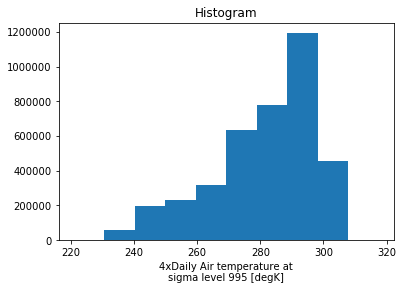

In [4]:
ds.air.plot();

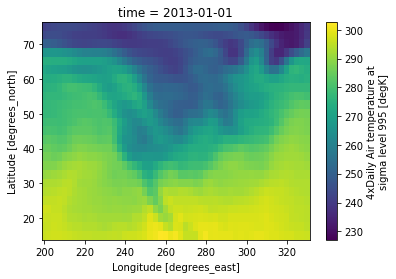

In [5]:
ds.air.isel(time=0).plot();

In [6]:
ds.air.hvplot()

:NdOverlay   [Element]
   :Histogram   [air]   (air_count)

In [7]:
ds.hvplot.image(cmap='fire')

:DynamicMap   [time]
   :Image   [lon,lat]   (air)

In [8]:
ds.hvplot.contourf(levels=np.linspace(230,320,11), cmap='fire')

:DynamicMap   [time]
   :Polygons   [lon,lat]   (air)

In [9]:
A = ds.hvplot.image()

In [10]:
# What is A?
print(A)

:DynamicMap   [time]


In [11]:
A = ds.isel(time=slice(0,10)).hvplot.image(dynamic=False)

In [12]:
print(A)

:HoloMap   [time]
   :Image   [lon,lat]   (air)


In [13]:
ds.hvplot.image(geo=True, cmap='fire')
# A glimpse of geoviews

:DynamicMap   [time]
   :Image   [lon,lat]   (air)

In [21]:
ds.hvplot.image(geo=True, coastline=True, cmap='fire').hist()

:AdjointLayout
   :DynamicMap   [time]
      :Overlay
         .Image.I     :Image   [lon,lat]   (air)
         .Coastline.I :Feature   [Longitude,Latitude]
   :DynamicMap   [time]
      :Histogram   [air]   (air_frequency)

In [16]:
ds.hvplot.contourf(levels=np.linspace(230,320,11), geo=True, coastline=True, cmap='fire')


:DynamicMap   [time]
   :Overlay
      .Polygons.I  :Polygons   [lon,lat]   (air)
      .Coastline.I :Feature   [Longitude,Latitude]

In [34]:
ds.hvplot.image(x='time',  cmap='fire')


:DynamicMap   [lat]
   :Image   [time,lon]   (air)

In [35]:
ds.hvplot.image(x='time',  cmap='fire', datashade=True)

:DynamicMap   [lat]
   :RGB   [time,lon]   (R,G,B,A)

In [33]:
ds.hvplot.image(x='time', y='lat', datashade=True, cmap='fire')


:DynamicMap   [lon]
   :RGB   [time,lat]   (R,G,B,A)

Not uncommon to run into bugs!! As there are lot of moving parts and the code is still young, things break when new updates come in. 

Maybe they need to write more tests? ;) 

Don't be scared, go to: https://discourse.holoviz.org/ and complain, someone will usually respond. 